In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-dataset/train-images.idx3-ubyte
/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte
/kaggle/input/mnist-dataset/train-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte


In [2]:
import keras
import tensorflow as tf
import time
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [3]:
import struct

def load_mnist_images(filename):
    with open(filename, 'rb') as f:
        magic, num, rows, cols = struct.unpack('>IIII', f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num, rows, cols)
        return images

def load_mnist_labels(filename):
    with open(filename, 'rb') as f:
        magic, num = struct.unpack('>II', f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
        return labels

In [4]:
X_train = load_mnist_images('/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte')
y_train = load_mnist_labels('/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte')
X_test = load_mnist_images('/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
y_test = load_mnist_labels('/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

print(f"x_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")


x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [5]:
X_train = X_train.astype('float32')  / 255.0
X_test = X_test.astype('float32')  / 255.0

# Create the first MLP Model

In [6]:
# Flatten the images from 28x28 dimensions and normalize them
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_test = X_test.reshape((X_test.shape[0], 28 * 28))

print("x_train : ",X_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",X_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 784)
y_train :  (60000,)
x_test  :  (10000, 784)
y_test  :  (10000,)


In [7]:
# Define the model
model0 = Sequential()

# Input layer
# Define the input layer with the shape corresponding to flattened 28x28 images
model0.add(tf.keras.layers.Input(shape=(28 * 28,)))

# Add the hidden layer with 128 units and ReLU activation function
model0.add(tf.keras.layers.Dense(128, activation='relu'))

# Add a dropout layer with a rate of 0.3 to reduce overfitting during training
model0.add(tf.keras.layers.Dropout(0.3))

# Output layer: Using softmax activation for multi-class classification.
model0.add(tf.keras.layers.Dense(10, activation='softmax'))

In [8]:
# Summary of the model
model0.summary()

model0.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

if os.path.exists("Best_points.keras"):
    os.remove("Best_points.keras")

MCP = ModelCheckpoint('Best_points.keras', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')

In [10]:
batch_size  = 64
epochs      =  16

start_time0 = time.time()
history0 = model0.fit(  X_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      
                      validation_data = (X_test, y_test),callbacks=MCP)
stop_time0 = time.time()

# Calculate elapsed time
elapsed_time0 = stop_time0 - start_time0
minutes0 = int(elapsed_time0 // 60)
seconds0 = int(elapsed_time0 % 60)

# Print time used in minutes and seconds
print(f'training_time0 = {minutes0} min {seconds0} sec')

Epoch 1/16
924/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5793 - loss: 1.4191
Epoch 1: val_accuracy improved from -inf to 0.88190, saving model to Best_points.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5815 - loss: 1.4123 - val_accuracy: 0.8819 - val_loss: 0.4825
Epoch 2/16
928/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8460 - loss: 0.5416
Epoch 2: val_accuracy improved from 0.88190 to 0.90400, saving model to Best_points.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8460 - loss: 0.5413 - val_accuracy: 0.9040 - val_loss: 0.3677
Epoch 3/16
929/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8754 - loss: 0.4366
Epoch 3: val_accuracy improved from 0.90400 to 0.91430, saving model to Best_points.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8754 - loss: 0.4365 - val_accuracy: 0.9143 - val_loss: 0.3215
Epoch 4/16
934/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8894 - loss: 0.3873
Epoch 4: val_accuracy improved from 0.

In [11]:
score = model0.evaluate(X_test, y_test, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss     : 0.1713
Test accuracy : 0.9499


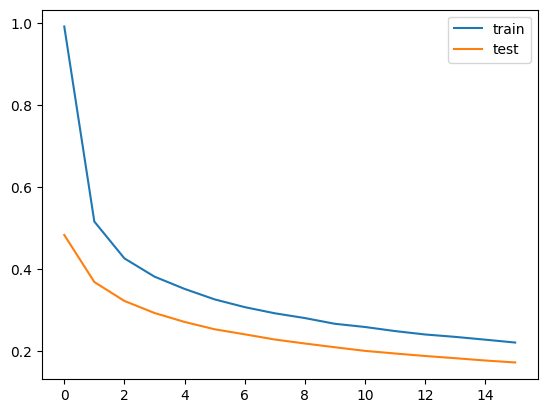

In [12]:
plt.plot(history0.history['loss'], label='train')
plt.plot(history0.history['val_loss'], label='test')
plt.legend()

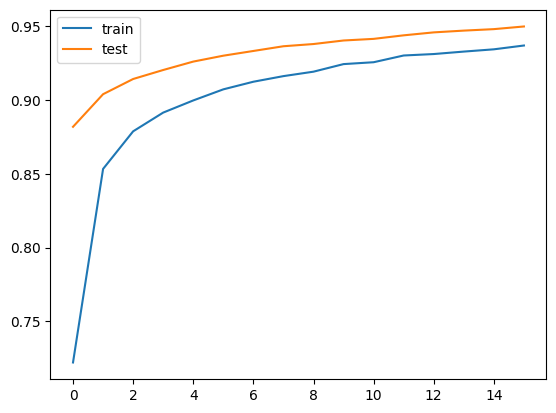

In [13]:
plt.plot(history0.history['accuracy'], label='train')
plt.plot(history0.history['val_accuracy'], label='test')
plt.legend()

# Create the second MLP Model

In [14]:
# Define the model
model01 = Sequential()

# Input layer
# Define the input layer with the shape corresponding to flattened 28x28 images
model01.add(tf.keras.layers.Input(shape=(28 * 28,)))

# Add the first hidden layer with 512 units and ReLU activation function
model01.add(tf.keras.layers.Dense(512, activation='relu'))

# Add a dropout layer with a rate of 0.3 to reduce overfitting during training
model01.add(tf.keras.layers.Dropout(0.3))

# Hidden Layer
# Adding the first hidden layer with 256 units and ReLU activation function.
model01.add(tf.keras.layers.Dense(256, activation='relu'))  # hidden layer 1

# Adding a dropout layer with a rate of 0.3 to reduce overfitting.
model01.add(tf.keras.layers.Dropout(0.3))

# Adding the second hidden layer with 128 units and ReLU activation function.
model01.add(tf.keras.layers.Dense(128, activation='relu'))  # hidden layer 2

# Adding another dropout layer with a rate of 0.3 to enhance generalization.
model01.add(tf.keras.layers.Dropout(0.3))

# Output Layer
# Output layer: Using softmax activation for multi-class classification.
model01.add(tf.keras.layers.Dense(10, activation='softmax'))

# Create the third MLP Model

In [15]:
# Define the model
model1 = Sequential()

# Input layer
# Define the input layer with the shape corresponding to flattened 28x28 images
model1.add(tf.keras.layers.Input(shape=(28 * 28,)))

# Add the first hidden layer with 512 units and ReLU activation function
model1.add(tf.keras.layers.Dense(512, activation='relu'))

# Add a dropout layer with a rate of 0.3 to reduce overfitting during training
model1.add(tf.keras.layers.Dropout(0.3))

# Hidden Layer
# Adding the first hidden layer with 256 units and ReLU activation function.
model1.add(tf.keras.layers.Dense(256, activation='relu'))  # hidden layer 1

# Adding a dropout layer with a rate of 0.3 to reduce overfitting.
model1.add(tf.keras.layers.Dropout(0.3))

# Adding the second hidden layer with 128 units and ReLU activation function.
model1.add(tf.keras.layers.Dense(128, activation='relu'))  # hidden layer 2

# Adding another dropout layer with a rate of 0.3 to enhance generalization.
model1.add(tf.keras.layers.Dropout(0.3))

# Output Layer
# Output layer: Using softmax activation for multi-class classification.
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [16]:
# Summary of the model
model1.summary()

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

if os.path.exists("Best_points.keras"):
    os.remove("Best_points.keras")

MCP = ModelCheckpoint('Best_points.keras', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')

In [18]:
batch_size  = 256
epochs      =  16

start_time1 = time.time()
history1 = model1.fit(  X_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      
                      validation_data = (X_test, y_test),callbacks=MCP)
stop_time1 = time.time()

# Calculate elapsed time
elapsed_time1 = stop_time1 - start_time1
minutes1 = int(elapsed_time1 // 60)
seconds1 = int(elapsed_time1 % 60)

# Print time used in minutes and seconds
print(f'training_time1 = {minutes1} min {seconds1} sec')

Epoch 1/16
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7566 - loss: 0.7617
Epoch 1: val_accuracy improved from -inf to 0.95450, saving model to Best_points.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7576 - loss: 0.7588 - val_accuracy: 0.9545 - val_loss: 0.1466
Epoch 2/16
233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9479 - loss: 0.1728
Epoch 2: val_accuracy improved from 0.95450 to 0.96850, saving model to Best_points.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9480 - loss: 0.1726 - val_accuracy: 0.9685 - val_loss: 0.1009
Epoch 3/16
233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9641 - loss: 0.1205
Epoch 3: val_accuracy improved from 0.96850 to 0.97450, saving model to Best_points.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9642 - loss: 0.1204 - val_accuracy: 0.9745 - val_loss: 0.0842
Epoch 4/16
233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9719 - loss: 0.0964
Epoch 4: val_accuracy improved 

In [19]:
score = model1.evaluate(X_test, y_test, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss     : 0.0717
Test accuracy : 0.9821


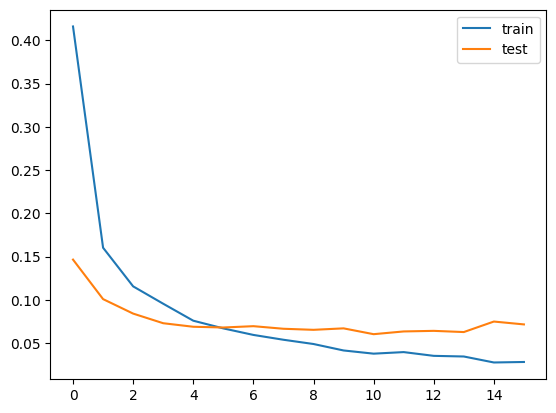

In [20]:
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.legend()

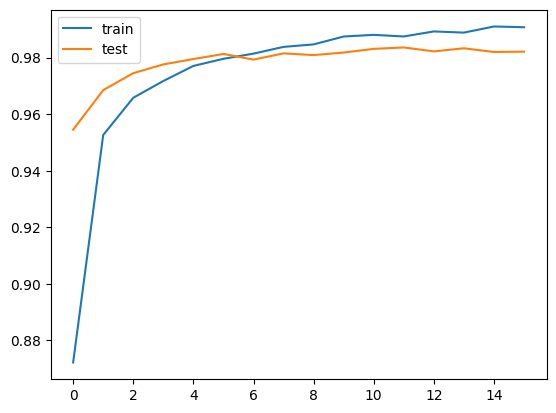

In [21]:
plt.plot(history1.history['accuracy'], label='train')
plt.plot(history1.history['val_accuracy'], label='test')
plt.legend()

# Create the CNN Model

In [22]:
X_train = X_train.reshape(-1,28,28,1)
X_test  = X_test.reshape(-1,28,28,1)

print("x_train : ",X_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",X_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test  :  (10000, 28, 28, 1)
y_test  :  (10000,)


In [23]:
# Define the model
model2 = Sequential()

# Input layer
model2.add(keras.layers.Input(shape=(28, 28, 1)))

# Convolutional Layer 1
model2.add(Conv2D(8, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))

# Convolutional Layer 2
model2.add(Conv2D(16, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))

# Flatten and Fully Connected Layers
model2.add(Flatten())
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.5))

# Output Layer
model2.add(Dense(10, activation='softmax'))

In [24]:
# Summary of the model
model2.summary()

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        40,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,358 (165.46 KB)

 Trainable params: 42,358 (165.46 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

if os.path.exists("Best_points.keras"):
    os.remove("Best_points.keras")

MCP = ModelCheckpoint('Best_points.keras', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')

In [26]:
batch_size  = 256
epochs      =  16

start_time2 = time.time()
history2 = model2.fit(  X_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      
                      validation_data = (X_test, y_test),callbacks=MCP)
stop_time2 = time.time()

# Calculate elapsed time
elapsed_time2 = stop_time2 - start_time2
minutes2 = int(elapsed_time2 // 60)
seconds2 = int(elapsed_time2 % 60)

# Print time used in minutes and seconds
print(f'training_time2 = {minutes2} min {seconds2} sec')

Epoch 1/16
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5458 - loss: 1.3456
Epoch 1: val_accuracy improved from -inf to 0.95000, saving model to Best_points.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.5466 - loss: 1.3434 - val_accuracy: 0.9500 - val_loss: 0.1857
Epoch 2/16
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9024 - loss: 0.3222
Epoch 2: val_accuracy improved from 0.95000 to 0.96900, saving model to Best_points.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.9025 - loss: 0.3221 - val_accuracy: 0.9690 - val_loss: 0.1025
Epoch 3/16
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9326 - loss: 0.2226
Epoch 3: val_accuracy improved from 0.96900 to 0.97460, saving model to Best_points.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.9326 - loss: 0.2226 - val_accuracy: 0.9746 - val_loss: 0.0805
Epoch 4/16
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9453 - loss: 0.1807
Epoch 4: val_accuracy improv

In [27]:
score = model2.evaluate(X_test, y_test, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss     : 0.0353
Test accuracy : 0.9876


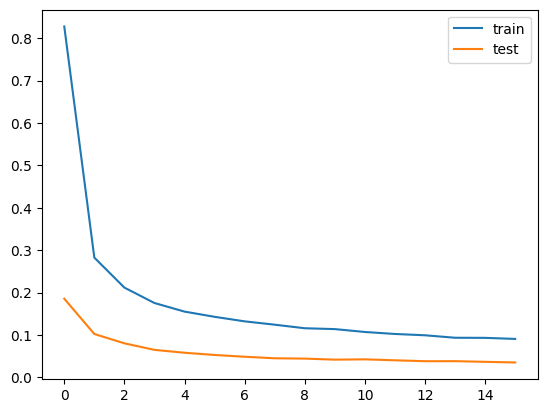

In [28]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()

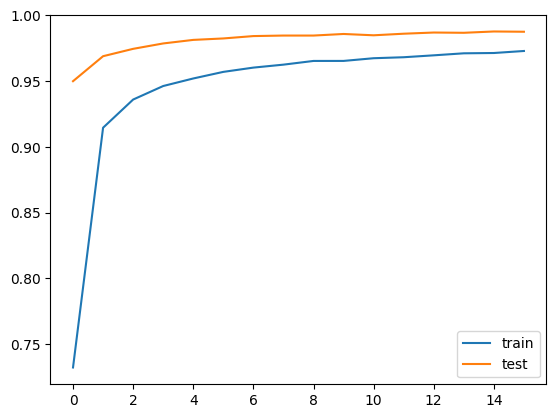

In [29]:
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='test')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


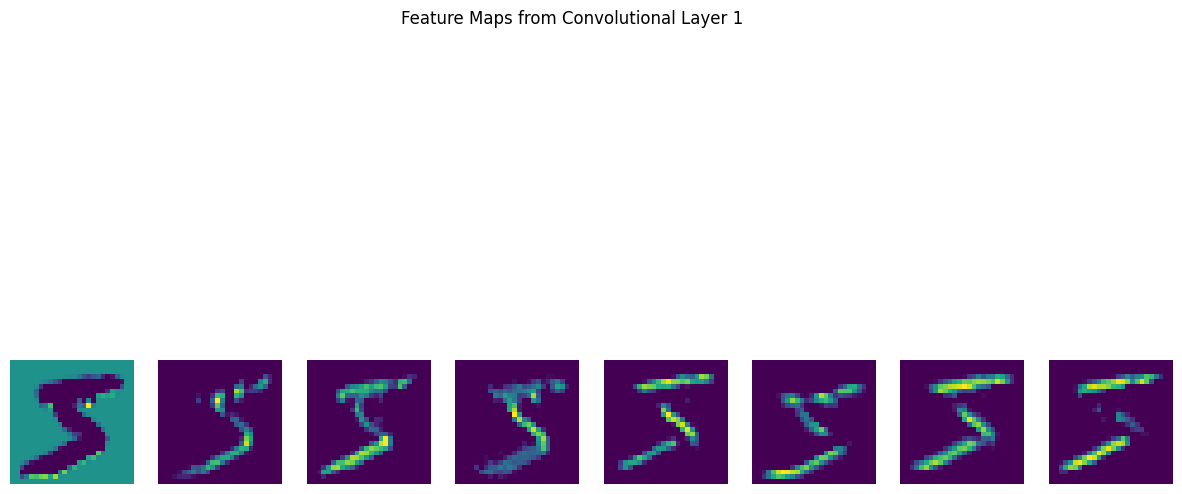

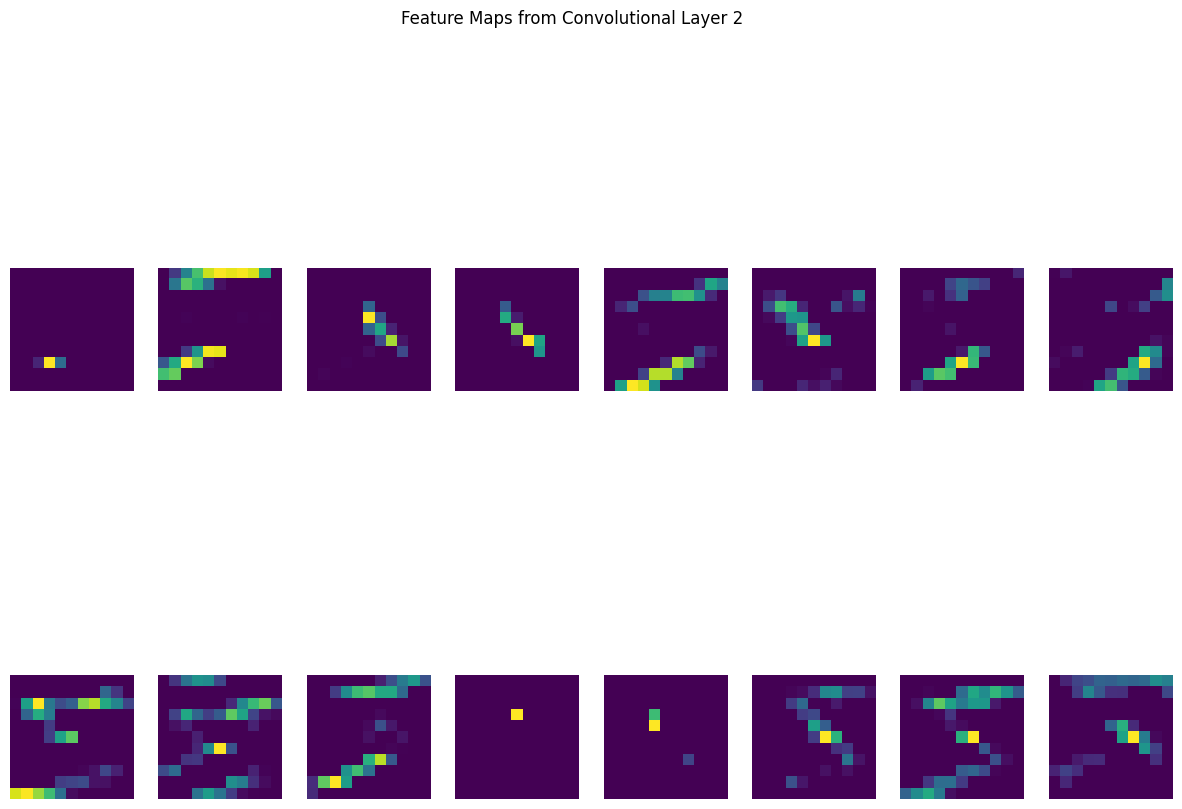

In [30]:
import matplotlib.pyplot as plt
from keras.models import Model

# Choose an image from the dataset
image = X_train[0]  # Select the first training image
image = image.reshape(1, 28, 28, 1)  # Add batch dimension

# Define a new model to output feature maps of the convolutional layers
input_tensor = model2.layers[0].input

layer_outputs = [layer.output for layer in model2.layers if 'conv' in layer.name]
feature_map_model = Model(inputs=input_tensor, outputs=layer_outputs)

# Get feature maps for the selected image
feature_maps = feature_map_model.predict(image)

# Visualize feature maps
for layer_index, feature_map in enumerate(feature_maps):
    num_filters = feature_map.shape[-1]  # Number of filters in the layer
    plt.figure(figsize=(15, 15))
    for i in range(num_filters):
        plt.subplot(num_filters // 8 + 1, 8, i + 1)  # 8 columns
        plt.imshow(feature_map[0, :, :, i], cmap='viridis')
        plt.axis('off')
    plt.suptitle(f'Feature Maps from Convolutional Layer {layer_index + 1}')
    plt.show()

# Create the ResNet Model

In [31]:
# Residual block definition
def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x
    # First convolution
    x = Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    # Second convolution
    x = Conv2D(filters, kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    # Add shortcut connection
    if stride != 1:  # If stride changes, adjust shortcut to match dimensions
        shortcut = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)
    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

# Input layer
input_layer = Input(shape=(28, 28, 1))

# Initial convolution and pooling
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)

# Add residual blocks
x = residual_block(x, filters=16)
x = residual_block(x, filters=32, stride=2)
x = residual_block(x, filters=64, stride=2)

# Global average pooling and fully connected layers
x = GlobalAveragePooling2D()(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(10, activation='softmax')(x)

# Define the ResNet model
model3 = Model(inputs=input_layer, outputs=output_layer)

In [32]:
# Summary of the model
model3.summary()

# Compile the model
model3.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 28, 28,    │        160 │ input_layer_4[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 14, 14,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 14, 14,    │      2,320 │ max_pooling2d_2[… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 14, 14,    │         64 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 14, 14,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 14, 14,    │      2,320 │ re_lu[0][0]       │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │         64 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 14, 14,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 14, 14,    │          0 │ add[0][0]         │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 7, 7, 32)  │      4,640 │ re_lu_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 32)  │        128 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 7, 7, 32)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 7, 7, 32)  │      9,248 │ re_lu_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 7, 7, 32)  │        544 │ re_lu_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 32)  │        128 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 32)  │        128 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 7, 7, 32)  │          0 │ batch_normalizat… │
│                     │                   │            │ batch_normalizat

 Total params: 85,558 (334.21 KB)

 Trainable params: 84,918 (331.71 KB)

 Non-trainable params: 640 (2.50 KB)

In [33]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

if os.path.exists("Best_points.keras"):
    os.remove("Best_points.keras")

MCP = ModelCheckpoint('Best_points.keras', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')

In [34]:
# Training configuration
batch_size = 256
epochs = 16

# Training the model
start_time3 = time.time()
history3 = model3.fit(X_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=(X_test, y_test),callbacks=MCP)
stop_time3 = time.time()

# Calculate elapsed time
elapsed_time3 = stop_time3 - start_time3
minutes3 = int(elapsed_time3 // 60)
seconds3 = int(elapsed_time3 % 60)
print(f'training_time3 = {minutes3} min {seconds3} sec')

Epoch 1/16
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.7070 - loss: 0.9204
Epoch 1: val_accuracy improved from -inf to 0.48230, saving model to Best_points.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 146ms/step - accuracy: 0.7077 - loss: 0.9183 - val_accuracy: 0.4823 - val_loss: 1.6901
Epoch 2/16
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.9789 - loss: 0.0801
Epoch 2: val_accuracy improved from 0.48230 to 0.97950, saving model to Best_points.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 35s 151ms/step - accuracy: 0.9789 - loss: 0.0801 - val_accuracy: 0.9795 - val_loss: 0.0650
Epoch 3/16
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.9858 - loss: 0.0535
Epoch 3: val_accuracy improved from 0.97950 to 0.98440, saving model to Best_points.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 34s 145ms/step - accuracy: 0.9858 - loss: 0.0534 - val_accuracy: 0.9844 - val_loss: 0.0507
Epoch 4/16
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.9888 - loss: 0.0404
Epoch 4: val_accuracy

In [35]:
score = model3.evaluate(X_test, y_test, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss     : 0.2678
Test accuracy : 0.9390


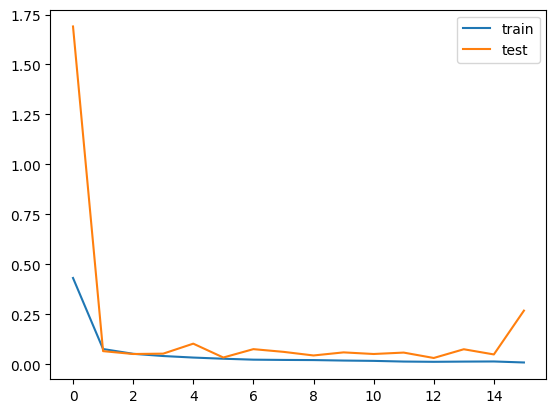

In [36]:
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='test')
plt.legend()

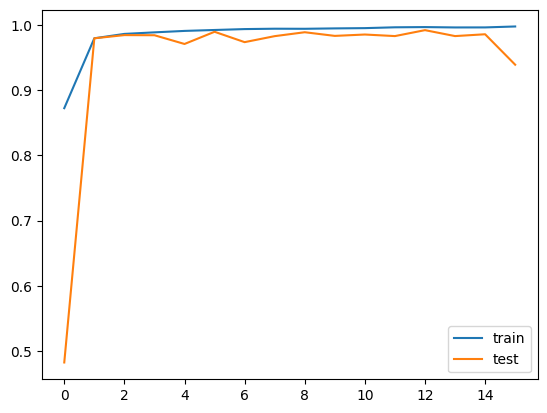

In [37]:
plt.plot(history3.history['accuracy'], label='train')
plt.plot(history3.history['val_accuracy'], label='test')
plt.legend()